In [71]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import seaborn as sns
import json

sns.set()

In [72]:
df = pd.read_csv('../../data/raw/routes.csv')
df

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [73]:
print(f'I have {df.shape[0]} routes.')

I have 67663 routes.


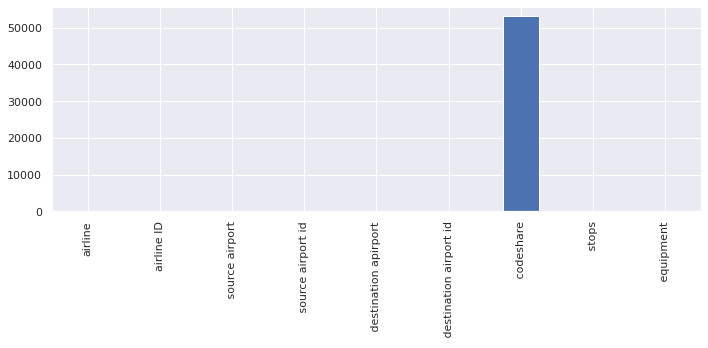

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df.isna().sum().plot(kind= 'bar')
plt.tight_layout()

In [75]:
df[' stops'].value_counts()

0    67652
1       11
Name:  stops, dtype: int64

In [76]:
print(f"The are {df[' stops'].value_counts().iloc[1]} routes with one stop.")

The are 11 routes with one stop.


What routes they are?

In [77]:
df.loc[df[' stops'] == 1,:]

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
2066,5T,1623,YRT,132,YEK,50,NaN,1,ATR
7810,AC,330,ABJ,253,BRU,302,NaN,1,333
8272,AC,330,YVR,156,YBL,30,NaN,1,BEH
17767,CU,1936,FCO,1555,HAV,1909,NaN,1,767
25116,FL,1316,HOU,3566,SAT,3621,NaN,1,735
25220,FL,1316,MCO,3878,HOU,3566,NaN,1,73W
25230,FL,1316,MCO,3878,ORF,3611,NaN,1,717
49746,SK,4319,ARN,737,GEV,715,NaN,1,ATP
63567,WN,4547,BOS,3448,MCO,3878,NaN,1,73W
64042,WN,4547,MCO,3878,BOS,3448,NaN,1,73W


Me quedo solo con lo que me interesa.

In [78]:
df.columns

Index(['airline', 'airline ID', ' source airport', ' source airport id',
       ' destination apirport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

In [79]:
df.rename(columns = {' source airport': 'source_airport', ' destination apirport': 'destination_airport'},
          inplace = True)

In [80]:
df.columns

Index(['airline', 'airline ID', 'source_airport', ' source airport id',
       'destination_airport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

In [81]:
df = df[['source_airport', 'destination_airport']]
df

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


I want to drop the airports that are not in my IATA -> Country. Because I will not be able to know to which country belongs to.

In [82]:
df2 = pd.read_csv('../../data/raw/airport_codes.csv')
df2

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...,...
55928,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
55929,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
55930,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
55931,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"


Me quedo solo con las columnas que me interesa, para luego hacer el join y no tener información extra. Ojo! Que hay aeropuertos que en type es igual a cerrrado, esos tampoco me interesa tenerlos.

In [83]:
df2['type'].value_counts()

small_airport     34297
heliport          11481
medium_airport     4542
closed             3948
seaplane_base      1024
large_airport       616
balloonport          25
Name: type, dtype: int64

In [84]:
print(f"There are {df2['type'].value_counts()['closed']} airports closed.")

There are 3948 airports closed.


Me quedo con los aeropuertos que no están cerrados y donde el iata code y el iso country no esta vacio.

In [85]:
df2 = df2.loc[(df2['type'] != 'closed') &  (~df2['iata_code'].isna()) & (~df2['iso_country'].isna()),
              ['name', 'iso_country', 'iata_code', 'continent', 'coordinates']]
df2

,name,iso_country,iata_code,continent,coordinates
223,Utirik Airport,MH,UTK,OC,"169.852005, 11.222"
440,Ocean Reef Club Airport,US,OCA,NaN,"-80.274803161621, 25.325399398804"
595,Pilot Station Airport,US,PQS,NaN,"-162.899994, 61.934601"
674,Crested Butte Airpark,US,CSE,NaN,"-106.928341, 38.851918"
1089,LBJ Ranch Airport,US,JCY,NaN,"-98.62249755859999, 30.251800537100003"
...,...,...,...,...,...
55924,Zhoushuizi Airport,CN,DLC,AS,"121.53900146484375, 38.9656982421875"
55925,Tonghua Sanyuanpu Airport,CN,TNH,AS,"125.703333333, 42.2538888889"
55926,Taoxian Airport,CN,SHE,AS,"123.48300170898438, 41.639801025390625"
55927,Yanji Chaoyangchuan Airport,CN,YNJ,AS,"129.451004028, 42.8828010559"


Solo tengo nans en contienentes

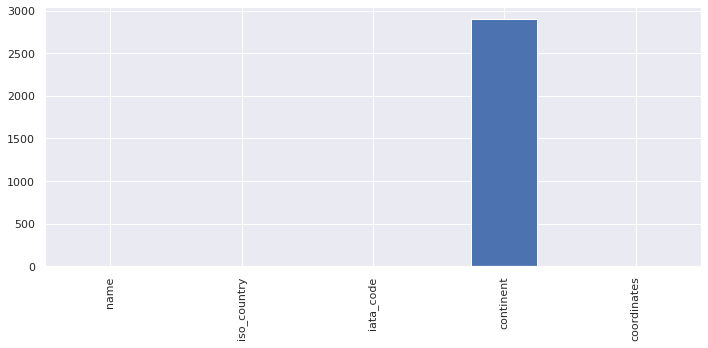

In [86]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df2.isna().sum().plot(kind= 'bar')
plt.tight_layout()

Ojo también hay aeropuertos duplicados.

In [87]:
print(f'Hay {df2.duplicated().sum()} filas duplicadas.')

Hay 4 filas duplicadas.


In [88]:
df2.drop_duplicates(subset = 'iata_code', inplace = True)
print(f'Hay {df2.duplicated().sum()} filas duplicadas.')

Hay 0 filas duplicadas.


Ahora tengo el dataframe completamiento limpio con la información que me interesa.

Podría pasar las rutas entre aeropuertos directamente a rutas entre paises, pero tmb me interesa tener ese grafo. Puedo hacerme los dos grafos...

In [89]:
iata_to_country_rev1 = pd.Series(df2['iso_country'].values, index = df2['iata_code']).to_dict()
iata_to_country_rev1 # diccionario que me pasa de IATA a country

{'UTK': 'MH',
 'OCA': 'US',
 'PQS': 'US',
 'CSE': 'US',
 'JCY': 'US',
 'PMX': 'US',
 'WLR': 'US',
 'NUP': 'US',
 'PTC': 'US',
 'ICY': 'US',
 'PPV': 'US',
 'KKK': 'US',
 'MHS': 'US',
 'NIR': 'US',
 'GCT': 'US',
 'ELW': 'US',
 'LVD': 'US',
 'HGZ': 'US',
 'OTN': 'US',
 'TLF': 'US',
 'BZT': 'US',
 'HBH': 'US',
 'FAK': 'US',
 'BYW': 'US',
 'DRF': 'US',
 'BDF': 'US',
 'VRS': 'US',
 'GDH': 'US',
 'ATT': 'US',
 'LIV': 'US',
 'PDB': 'US',
 'KOZ': 'US',
 'TNK': 'US',
 'WHD': 'US',
 'MNT': 'US',
 'TKI': 'US',
 'WKK': 'US',
 'WFB': 'US',
 'NNK': 'US',
 'BKF': 'US',
 'BCS': 'US',
 'SPQ': 'US',
 'TSS': 'US',
 'QNY': 'US',
 'BWL': 'US',
 'WYB': 'US',
 'CWS': 'US',
 'TEK': 'US',
 'DUF': 'US',
 'SSW': 'US',
 'FOB': 'US',
 'PUL': 'US',
 'CCD': 'US',
 'WMK': 'US',
 'AXB': 'US',
 'REE': 'US',
 'WDN': 'US',
 'WWP': 'US',
 'CHU': 'US',
 'UGS': 'US',
 'MXG': 'US',
 'PSQ': 'US',
 'KLL': 'US',
 'SGW': 'US',
 'WTL': 'US',
 'TWA': 'US',
 'KCQ': 'US',
 'AAD': 'SO',
 'ABP': 'PG',
 'ALV': 'AD',
 'ADC': 'PG',
 'ADV'

Guardo un diccionario con la relacion IATA --> Country

In [90]:
with open('../../data/interim/iata_to_country.txt', 'w') as file:
    json.dump(iata_to_country_rev1, file)

Cojo el dataframe original de routes, y hago el mapeo de cada aeropuerto con su pais

In [91]:
df['source_country'] = df['source_airport'].map(iata_to_country_rev1)
df['destination_country'] = df['destination_airport'].map(iata_to_country_rev1)
df

<ipython-input-91-4a33367cba25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_country'] = df['source_airport'].map(iata_to_country_rev1)
<ipython-input-91-4a33367cba25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destination_country'] = df['destination_airport'].map(iata_to_country_rev1)


,source_airport,destination_airport,source_country,destination_country
0,AER,KZN,RU,RU
1,ASF,KZN,RU,RU
2,ASF,MRV,RU,RU
3,CEK,KZN,RU,RU
4,CEK,OVB,RU,RU
...,...,...,...,...
67658,WYA,ADL,AU,AU
67659,DME,FRU,RU,KG
67660,FRU,DME,KG,RU
67661,FRU,OSS,KG,KG


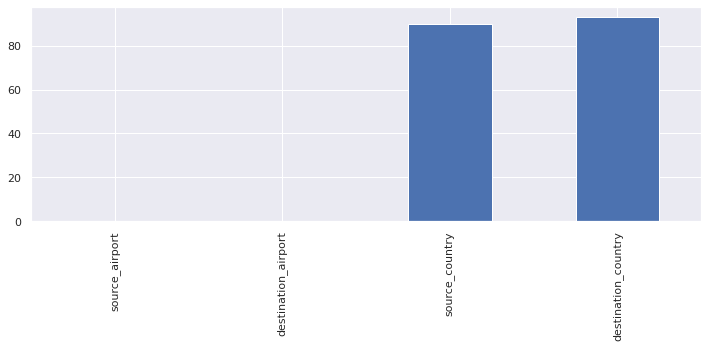

In [92]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df.isna().sum().plot(kind = 'bar')
plt.tight_layout()

Quiero quitar las sfilas donde no tengo el pais de origen o el de destino

In [93]:
df.dropna(inplace = True)
df

<ipython-input-93-1a016f44adc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,source_airport,destination_airport,source_country,destination_country
0,AER,KZN,RU,RU
1,ASF,KZN,RU,RU
2,ASF,MRV,RU,RU
3,CEK,KZN,RU,RU
4,CEK,OVB,RU,RU
...,...,...,...,...
67658,WYA,ADL,AU,AU
67659,DME,FRU,RU,KG
67660,FRU,DME,KG,RU
67661,FRU,OSS,KG,KG


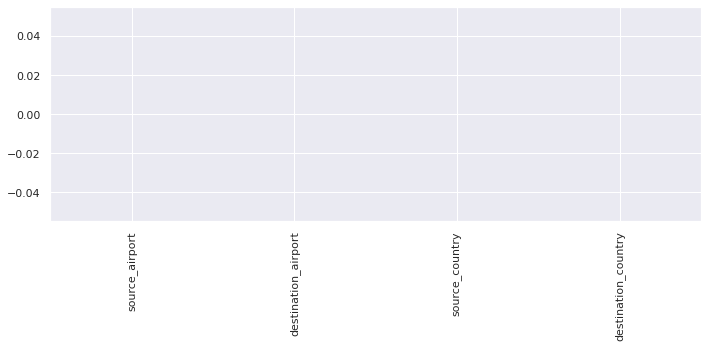

In [94]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
df.isna().sum().plot(kind = 'bar')
plt.tight_layout()

In [95]:
df

,source_airport,destination_airport,source_country,destination_country
0,AER,KZN,RU,RU
1,ASF,KZN,RU,RU
2,ASF,MRV,RU,RU
3,CEK,KZN,RU,RU
4,CEK,OVB,RU,RU
...,...,...,...,...
67658,WYA,ADL,AU,AU
67659,DME,FRU,RU,KG
67660,FRU,DME,KG,RU
67661,FRU,OSS,KG,KG


Quiero quitar todas las filas donde source_country == destination_country (vuelos nacionales)

In [96]:
df = df.loc[df['source_country'] != df['destination_country'], :]

In [97]:
df

,source_airport,destination_airport,source_country,destination_country
11,GYD,NBC,AZ,RU
25,NBC,GYD,RU,AZ
81,ABJ,BOY,CI,BF
82,ABJ,OUA,CI,BF
83,ACC,OUA,GH,BF
...,...,...,...,...
67507,TLS,ALG,FR,DZ
67508,TLS,ORN,FR,DZ
67509,VKO,ORY,RU,FR
67659,DME,FRU,RU,KG


Creo un grafo con networks entre las conexiones entre paises

In [98]:
G_country = nx.from_pandas_edgelist(df, 'source_country', 'destination_country', create_using=nx.DiGraph())
G_airport = nx.from_pandas_edgelist(df, 'source_airport', 'destination_airport', create_using=nx.DiGraph())

In [99]:
G_country.order()

230

In [100]:
print(f'There are {G_country.order()} nodes (countries) in the graph.')
print(f'There are {G_country.size()} edges (routes) between countries in the graph.')
print(f'There are {G_airport.order()} nodes (airports) in the graph.')
print(f'There are {G_airport.size()} edges (routes) between airports in the graph.')

There are 230 nodes (countries) in the graph.
There are 4595 edges (routes) between countries in the graph.
There are 1180 nodes (airports) in the graph.
There are 19512 edges (routes) between airports in the graph.


Si el país no esta en tableconvert_iso lo quito. Porque no lo podré relacionar con el nombre, ni localización.

In [101]:
df_countryiso = pd.read_csv("../../data/raw/tableconvert_iso.csv")
df_countryiso

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
251,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
252,Western Sahara,EH,ESH,732,24.5000,-13.0
253,Yemen,YE,YEM,887,15.0000,48.0
254,Zambia,ZM,ZMB,894,-15.0000,30.0


In [102]:
df_countryiso[df_countryiso['Alpha-2 code'] == 'ES']

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
211,Spain,ES,ESP,724,40.0,-4.0


In [103]:
H_country = G_country.copy() # hago la copia porq si no en el for estoy modificando lo que estoy cambiando

for country in G_country:
    if country not in df_countryiso['Alpha-2 code'].unique():
        H_country.remove_node(country)

Incorpor más información en la información del grafo de aeropuertos.

In [111]:
df2

,name,iso_country,iata_code,continent,coordinates
223,Utirik Airport,MH,UTK,OC,"169.852005, 11.222"
440,Ocean Reef Club Airport,US,OCA,NaN,"-80.274803161621, 25.325399398804"
595,Pilot Station Airport,US,PQS,NaN,"-162.899994, 61.934601"
674,Crested Butte Airpark,US,CSE,NaN,"-106.928341, 38.851918"
1089,LBJ Ranch Airport,US,JCY,NaN,"-98.62249755859999, 30.251800537100003"
...,...,...,...,...,...
55924,Zhoushuizi Airport,CN,DLC,AS,"121.53900146484375, 38.9656982421875"
55925,Tonghua Sanyuanpu Airport,CN,TNH,AS,"125.703333333, 42.2538888889"
55926,Taoxian Airport,CN,SHE,AS,"123.48300170898438, 41.639801025390625"
55927,Yanji Chaoyangchuan Airport,CN,YNJ,AS,"129.451004028, 42.8828010559"


In [112]:
df2.loc[df2['iata_code'] == 'YTY']

,name,iso_country,iata_code,continent,coordinates
55117,Yangzhou Taizhou Airport,CN,YTY,AS,"119.717141, 32.560184"


In [114]:
G_airportfull = G_airport.copy()

for airport in G_airportfull.nodes:
    G_airportfull.nodes[airport]['name'] = df2.loc[df2['iata_code'] == airport, 'name'].item()
    G_airportfull.nodes[airport]['iso_country'] = df2.loc[df2['iata_code'] == airport, 'iso_country'].item()
    G_airportfull.nodes[airport]['coordinates'] = df2.loc[df2['iata_code'] == airport, 'coordinates'].item()
    G_airportfull.nodes[airport]['continent'] = df2.loc[df2['iata_code'] == airport, 'continent'].item()

Para mirar uno por uno...

In [115]:
G_airportfull.nodes['BCN']

{'name': 'Barcelona International Airport',
 'iso_country': 'ES',
 'coordinates': '2.07846, 41.2971',
 'continent': 'EU'}

In [116]:
df_countryiso.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [117]:
alpha2_to_alpha3 = pd.Series(df_countryiso['Alpha-3 code'].values, index = df_countryiso['Alpha-2 code']).to_dict()
alpha2_to_country = pd.Series(df_countryiso['Country'].values, index = df_countryiso['Alpha-2 code']).to_dict()
alpha3_to_country = pd.Series(df_countryiso['Country'].values, index = df_countryiso['Alpha-3 code']).to_dict()

In [118]:
with open('../../data/interim/alpha2_to_alpha3.txt', 'w') as file:
    json.dump(alpha2_to_alpha3, file)
    
with open('../../data/interim/alpha2_to_country.txt', 'w') as file:
    json.dump(alpha2_to_country, file)
    
with open('../../data/interim/alpha3_to_country.txt', 'w') as file:
    json.dump(alpha3_to_country, file)

In [119]:
nx.write_gpickle(H_country, '../../data/interim//routes_countries.gpickle')
nx.write_gpickle(G_airportfull, '../../data/interim/routes_airports.gpickle')